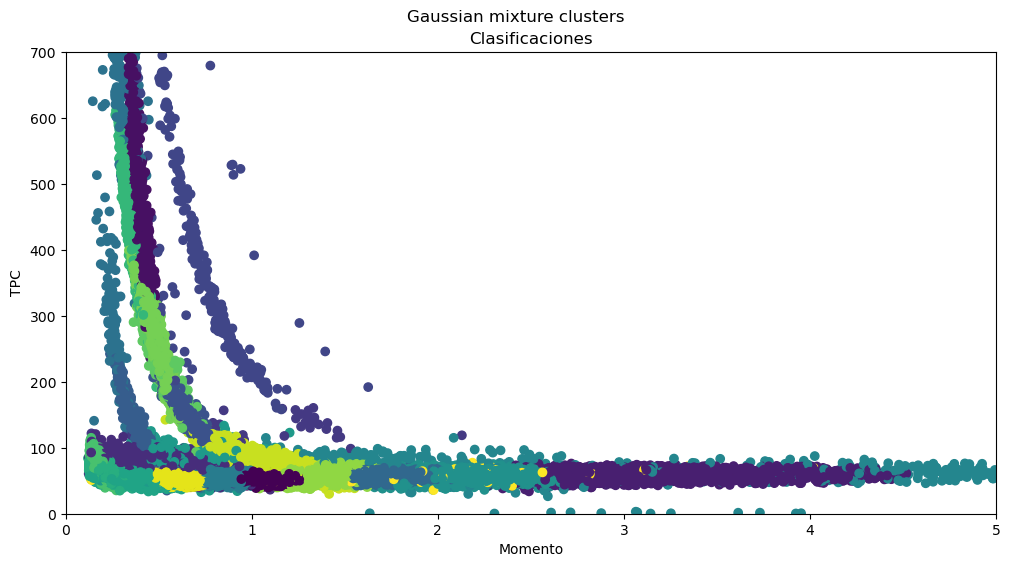

In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data set
data = pd.read_csv('Plomo_pos')  #CSV

# Select relevant columns (TPC and Momentum) after filtering
X= data[['TPC','Momento','ITS']]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fig, (ax1) = plt.subplots(figsize=(12, 6))

y_pred = GaussianMixture(n_components=25).fit_predict(X_scaled )
ax1.scatter(X['Momento'],X['TPC'],c=y_pred)
ax1.set_title("Clasificaciones")

# Show the graph
plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.xlabel('Momento')
plt.ylabel('TPC')
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()

In [2]:
import numpy as np
# y_pred
unique_labels = np.unique(y_pred)
print("Etiquetas únicas predichas:")
print(unique_labels)

Etiquetas únicas predichas:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


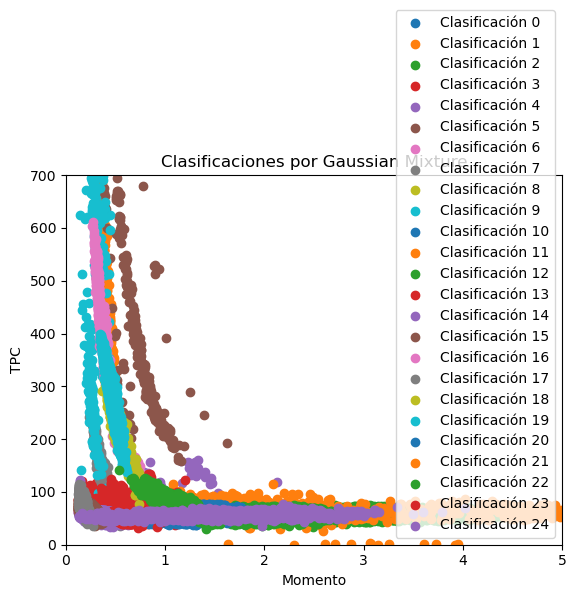

In [3]:
import matplotlib.pyplot as plt

# Iterate over predicted unique tags
for label in unique_labels:
    # Filter data points corresponding to the current label
    X_label = X[y_pred == label]
    
    # Plot the data points with the current label
    plt.scatter(X_label['Momento'], X_label['TPC'], label=f'Clasificación {label}')

# Configure the title and labels of the axis
plt.title('Clasificaciones por Gaussian Mixture')
plt.xlabel('Momento')
plt.ylabel('TPC')

#Show legend
plt.legend()

# Show the graph
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()


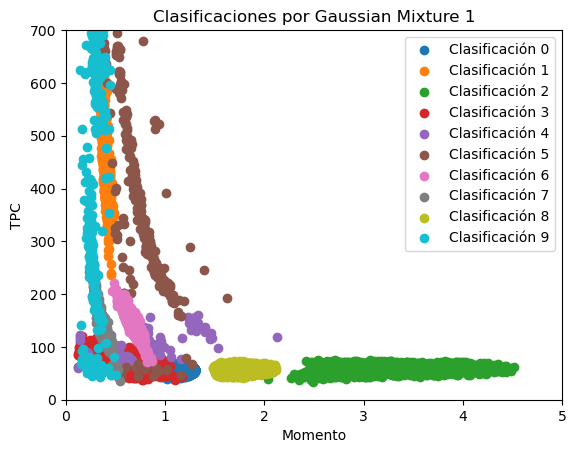

In [4]:
import matplotlib.pyplot as plt

# Iterate over predicted unique tags
for label in range(10):
    # Filter data points corresponding to the current label
    X_label = X[y_pred == label]
    
    # Plot the data points with the current label
    plt.scatter(X_label['Momento'], X_label['TPC'], label=f'Clasificación {label}')

# Configure the title and labels of the axis
plt.title('Clasificaciones por Gaussian Mixture 1')
plt.xlabel('Momento')
plt.ylabel('TPC')

# Show legend
plt.legend()

# Show the graph
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()

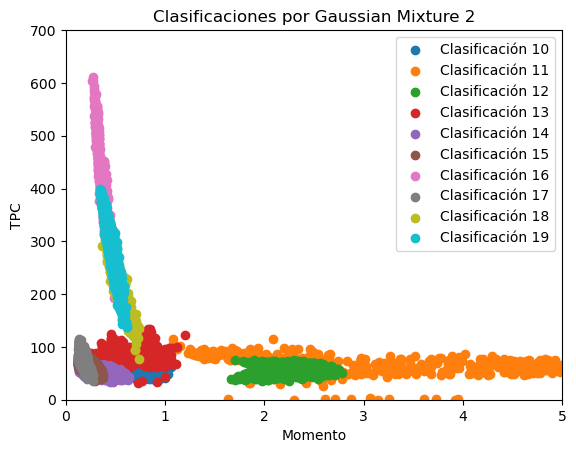

In [5]:
import matplotlib.pyplot as plt

# Iterate over predicted unique tags
for label in range(10,20):
    # Filter data points corresponding to the current label
    X_label = X[y_pred == label]
    
    # Plot the data points with the current label
    plt.scatter(X_label['Momento'], X_label['TPC'], label=f'Clasificación {label}')

# Configure the title and labels of the axis
plt.title('Clasificaciones por Gaussian Mixture 2')
plt.xlabel('Momento')
plt.ylabel('TPC')

# Show legend
plt.legend()

# Show the graph
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()

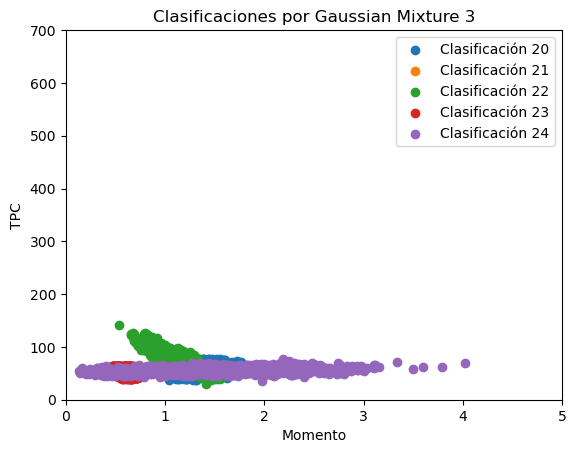

In [6]:
import matplotlib.pyplot as plt

# Iterate over predicted unique tags
for label in range(20,25):
    # Filter data points corresponding to the current label
    X_label = X[y_pred == label]
    
    # Plot the data points with the current label
    plt.scatter(X_label['Momento'], X_label['TPC'], label=f'Clasificación {label}')

# Configure the title and labels of the axis
plt.title('Clasificaciones por Gaussian Mixture 3')
plt.xlabel('Momento')
plt.ylabel('TPC')

# Show legend
plt.legend()

# Show the graph
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()

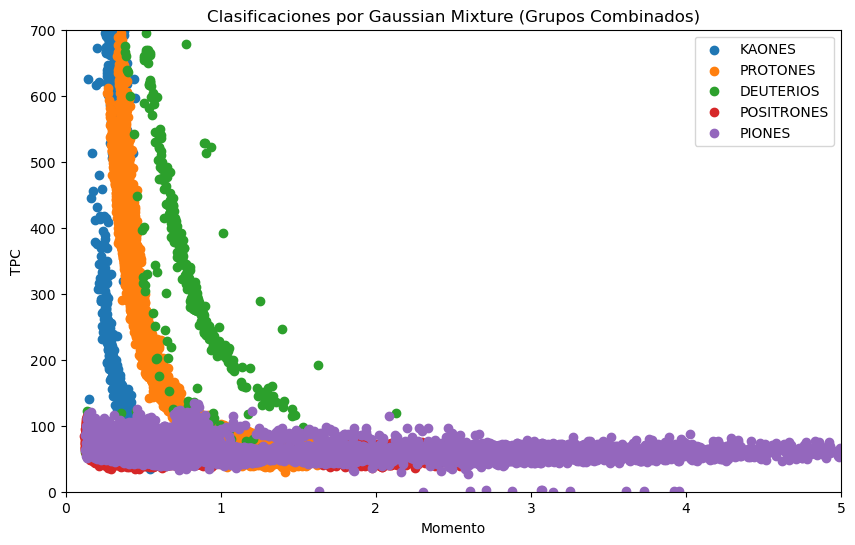

In [16]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the tags you want to combine in each group and their respective names
grupos_combinados = [[9,7], [1,6,19,18,16,22,20], [5,4],[10,12,17,15,14,21,23],[0,2,8,3,11,24,23,13]]
nombres_grupos = ['KAONES', 'PROTONES', 'DEUTERIOS','POSITRONES','PIONES',]

# Initialize a list to store the combined data points for each group
datos_grupos_combinados = []

# Iterate over the combined groups
for i, (grupo, nombre) in enumerate(zip(grupos_combinados, nombres_grupos), 1):
    # Inicializar una lista para almacenar los puntos de datos combinados para el grupo actual
    datos_grupo = []
    # Iterar sobre las etiquetas del grupo actual
    for label in grupo:
        # Filtrar los puntos de datos correspondientes a la etiqueta actual
        X_label = X[y_pred == label]
        # Agregar estos puntos de datos al grupo actual
        datos_grupo.append(X_label)
    # Concatenar los puntos de datos del grupo actual en una sola matriz
    datos_grupo = pd.concat(datos_grupo)
    # Agregar los puntos de datos del grupo actual a la lista de datos combinados para todos los grupos
    datos_grupos_combinados.append(datos_grupo)
    # Graficar los puntos de datos del grupo actual
    ax.scatter(datos_grupo['Momento'], datos_grupo['TPC'], label=nombre)

# Configurar el título y etiquetas de los ejes
ax.set_title('Clasificaciones por Gaussian Mixture (Grupos Combinados)')
ax.set_xlabel('Momento')
ax.set_ylabel('TPC')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()

In [17]:
np.save('cluster_labels.npy', y_pred)

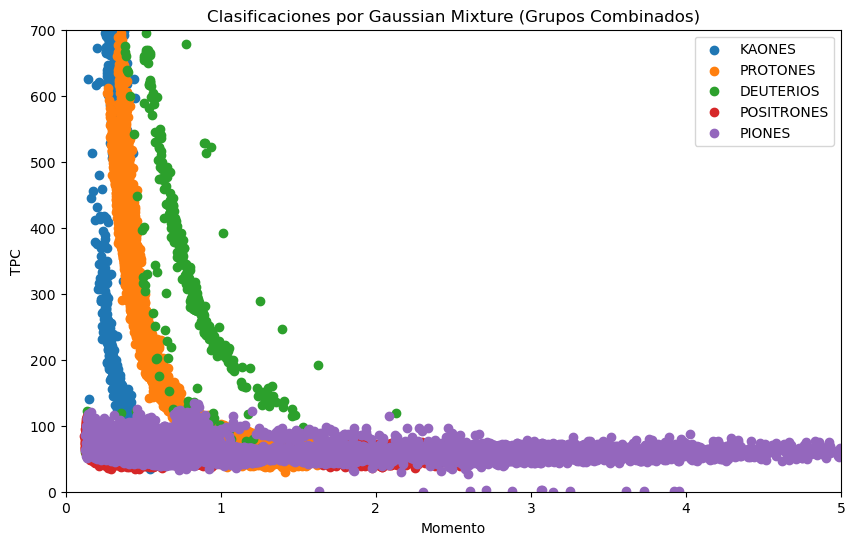

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data set
data = pd.read_csv('Plomo_pos')  # CSV

# Load previously calculated cluster labels
y_pred = np.load('cluster_labels.npy')  # ypred 

# Define the tags you want to combine in each group and their respective names
grupos_combinados = [[9,7], [1,6,19,18,16,22,20], [5,4],[10,12,17,15,14,21,23],[0,2,8,3,11,24,23,13]]
nombres_grupos = ['KAONES', 'PROTONES', 'DEUTERIOS','POSITRONES','PIONES']

# Create a column for new merged group labels
data['Grupo_Combinado'] = np.nan

# Iterate over the combined groups and assign the new labels
for grupo, nombre in zip(grupos_combinados, nombres_grupos):
    for label in grupo:
        data.loc[y_pred == label, 'Grupo_Combinado'] = nombre

# Select the relevant columns for the new CSV file
output_data = data[['Event', 'Particula', 'Px', 'Py', 'Pz', 'Carga', 'Grupo_Combinado']]

# Export the new dataframe to a CSV file
output_data.to_csv("PB-POS-C2.csv", index=False)

# Create a figure and axes for visualization
fig, ax = plt.subplots(figsize=(10, 6))

# View combined data by group
for nombre in nombres_grupos:
    datos_grupo = data[data['Grupo_Combinado'] == nombre]
    ax.scatter(datos_grupo['Momento'], datos_grupo['TPC'], label=nombre)

# Configure the title and labels of the axis
ax.set_title('Clasificaciones por Gaussian Mixture (Grupos Combinados)')
ax.set_xlabel('Momento')
ax.set_ylabel('TPC')

# Show legend
ax.legend()

# Show the graph
plt.xlim(0, 5)
plt.ylim(0, 700)
plt.show()
